There are 2 possibilities to to map a color to network nodes:

1) The feature you want to map is a **numerical** value. Then we will use a **continuous** color scale. On the left graph, A is darker than C that is darker than B…

2) The feature is **categorical**. On the right graph, A and B belongs to the same group, D and E are grouped together and C is alone in his group. We used a categorical color scale.  

Usually we work with 2 tables. The first one provides the **links between nodes**. The second one provides the **features of each node**. You can link these 2 files as follows:

## Continuous Color Scale (left)

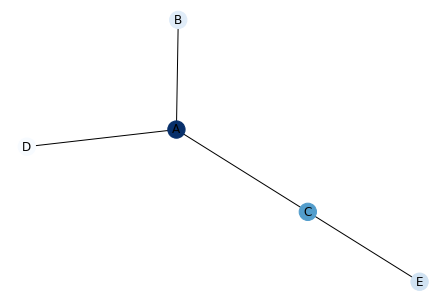

In [13]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
 
# And a data frame with characteristics for your nodes
carac = pd.DataFrame({ 'ID':['A', 'B', 'C','D','E'], 'myvalue':['123','25','76','12','34'] })
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# The order of the node for networkX is the following order:
G.nodes()
# NodeView(('A', 'D', 'B', 'C', 'E'))

# Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
 
# Here is the tricky part: I need to reorder carac, to assign the good color to each node
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
 
# Plot it, providing a continuous color scale with cmap:
nx.draw(G, with_labels=True, node_color=carac['myvalue'].astype(int), cmap=plt.cm.Blues)
plt.show()

## Categorical Color Scale (right)

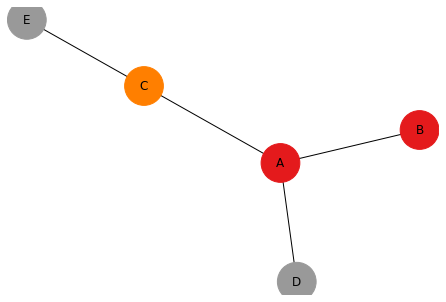

In [14]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
 
# And a data frame with characteristics for your nodes
carac = pd.DataFrame({ 'ID':['A', 'B', 'C','D','E'], 'myvalue':['group1','group1','group2','group3','group3'] })
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# The order of the node for networkX is the following order:
G.nodes()
# Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
 
# Here is the tricky part: I need to reorder carac to assign the good color to each node
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
 
# And I need to transform my categorical column in a numerical value: group1->1, group2->2...
carac['myvalue']=pd.Categorical(carac['myvalue'])
carac['myvalue'].cat.codes
 
# Custom the nodes:
nx.draw(G, with_labels=True, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1, node_size=1500)
